In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dibimbing/data/admission_data.csv')

In [ ]:
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0


In [ ]:
data.sample(10)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
103,317.0,104.0,2.0,4.5,4.0,8.47,no,0
125,300.0,100.0,3.0,2.0,3.0,8.66,yes,0
440,305.0,104.0,2.0,2.5,1.5,7.79,no,0
201,315.0,110.0,2.0,3.5,3.0,8.46,yes,1
377,290.0,100.0,1.0,1.5,2.0,7.56,no,0
224,305.0,105.0,2.0,3.0,2.0,8.23,no,0
212,NaN,120.0,4.0,5.0,5.0,9.66,yes,1
95,304.0,100.0,4.0,1.5,2.5,7.84,no,0
430,311.0,104.0,3.0,4.0,3.5,8.13,yes,1
185,327.0,113.0,4.0,4.5,4.5,9.11,yes,1


## MV n GS

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                496 non-null    float64
 1   toefl_score              497 non-null    float64
 2   univ_ranking             498 non-null    float64
 3   motiv_letter_strength    503 non-null    float64
 4   recommendation_strength  499 non-null    float64
 5   gpa                      501 non-null    float64
 6   research_exp             505 non-null    object 
 7   admit_status             505 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 31.7+ KB


In [ ]:
# number of missing values per column
data.isna().sum()

gre_score                  9
toefl_score                8
univ_ranking               7
motiv_letter_strength      2
recommendation_strength    6
gpa                        4
research_exp               0
admit_status               0
dtype: int64

In [ ]:
# percentage version
data.isna().sum() * 100 / len(data)

gre_score                  1.782178
toefl_score                1.584158
univ_ranking               1.386139
motiv_letter_strength      0.396040
recommendation_strength    1.188119
gpa                        0.792079
research_exp               0.000000
admit_status               0.000000
dtype: float64

In [ ]:
# Portion missing values considering all columns
((data.shape[0] - data.dropna().shape[0])/data.shape[0])*100

7.128712871287128

In [ ]:

data['gre_score'].fillna(data['gre_score'].median)

0      337.0
1      324.0
2      316.0
3      322.0
4      314.0
       ...  
500    313.0
501    328.0
502    321.0
503    325.0
504    314.0
Name: gre_score, Length: 505, dtype: object

In [ ]:

data['research_exp'].fillna(data['research_exp'].mode)

0      yes
1      yes
2      yes
3      yes
4       no
      ... 
500    yes
501    yes
502    yes
503    yes
504     no
Name: research_exp, Length: 505, dtype: object

##MV Handling

In [ ]:
# drop na values
data = data.dropna()

In [ ]:
# sanity check
data.isna().sum()

gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_status               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                469 non-null    float64
 1   toefl_score              469 non-null    float64
 2   univ_ranking             469 non-null    float64
 3   motiv_letter_strength    469 non-null    float64
 4   recommendation_strength  469 non-null    float64
 5   gpa                      469 non-null    float64
 6   research_exp             469 non-null    object 
 7   admit_status             469 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 33.0+ KB


## Duplicated data handling

In [ ]:
# number of duplicated data
data.duplicated().sum()

5

In [ ]:
# optional
# sample duplicated rows
data[data.duplicated(keep=False)].sort_values('gre_score').head(10)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
364,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
500,313.0,102.0,3.0,3.5,4.0,8.90,yes,1
74,314.0,106.0,3.0,3.0,5.0,8.90,no,1
504,314.0,106.0,3.0,3.0,5.0,8.90,no,1
111,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
502,321.0,109.0,4.0,4.0,4.0,8.68,yes,0
10,325.0,106.0,3.0,3.5,4.0,8.40,yes,0
503,325.0,106.0,3.0,3.5,4.0,8.40,yes,0
311,328.0,108.0,4.0,4.5,4.0,9.18,yes,1
501,328.0,108.0,4.0,4.5,4.0,9.18,yes,1


In [ ]:
# drop duplicated rows
data = data.drop_duplicates()

In [ ]:
# sanity check
data.duplicated().sum()

0

# Data understanding

In [ ]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['research_exp']

numericals = ['gre_score', 'toefl_score', 'univ_ranking', 'motiv_letter_strength','recommendation_strength','gpa','admit_status']

In [ ]:
# numerical statistical sumary
data[numericals].describe()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,admit_status
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,316.327586,107.090517,3.118534,3.366379,3.476293,8.567241,0.571121
std,11.242104,5.934888,1.119704,0.968974,0.919244,0.598476,0.495450
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.000000
50%,316.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000
75%,324.000000,111.250000,4.000000,4.000000,4.000000,9.025000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [ ]:
# value counts discrete columns
cols = ['univ_ranking','motiv_letter_strength', 'recommendation_strength', 'admit_status']
for col in cols:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of univ_ranking column
3.0    156
2.0    119
4.0     96
5.0     66
1.0     27
Name: univ_ranking, dtype: int64 

Value counts of motiv_letter_strength column
3.5    86
4.0    83
3.0    76
2.5    61
4.5    56
2.0    40
5.0    36
1.5    21
1.0     5
Name: motiv_letter_strength, dtype: int64 

Value counts of recommendation_strength column
3.0    96
4.0    86
3.5    80
4.5    55
2.5    49
5.0    47
2.0    40
1.5    10
1.0     1
Name: recommendation_strength, dtype: int64 

Value counts of admit_status column
1    265
0    199
Name: admit_status, dtype: int64 



In [ ]:
# describe method on categorical data
data[categoricals].describe()

,research_exp
count,464
unique,2
top,yes
freq,252


In [ ]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of research_exp column
yes    252
no     212
Name: research_exp, dtype: int64 



# Univrt

## Outlier detection

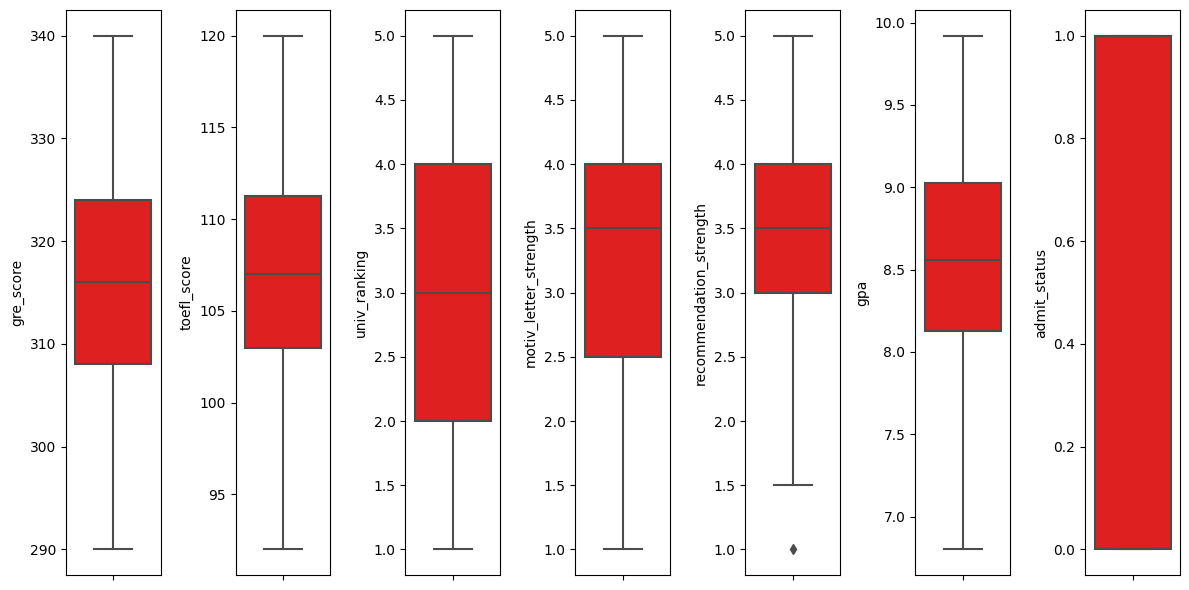

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

In [ ]:
# check the outlier full profile
outlier = data['recommendation_strength'].min()

data[data['recommendation_strength'] == outlier]

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
347,299.0,94.0,1.0,1.0,1.0,7.34,no,0


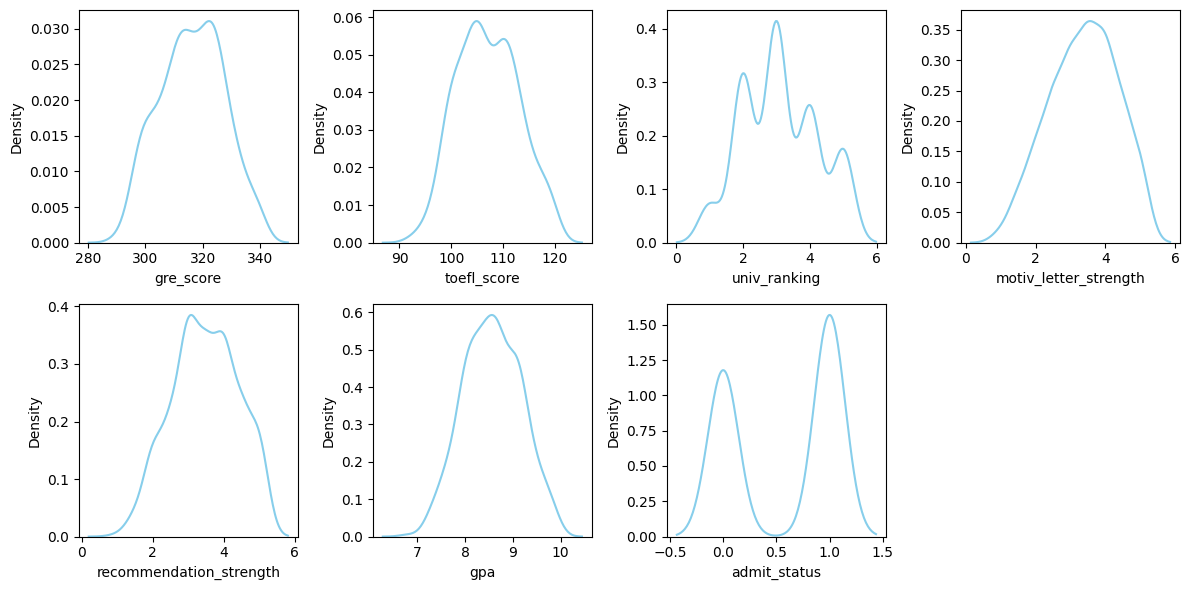

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

# Bivariate

In [ ]:
# remember the dataset
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_status
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,1
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,1
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,1
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,1
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0


<Axes: xlabel='research_exp', ylabel='count'>

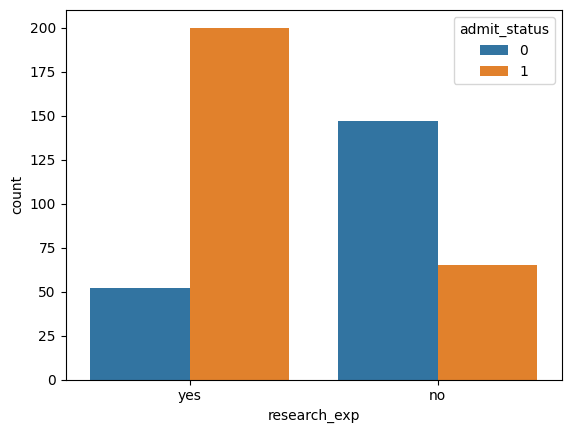

In [ ]:
# research_exp affect admit_status?
sns.countplot(data=data,
            x='research_exp',
            hue='admit_status'
            )

<ipython-input-34-dc2983cab186>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

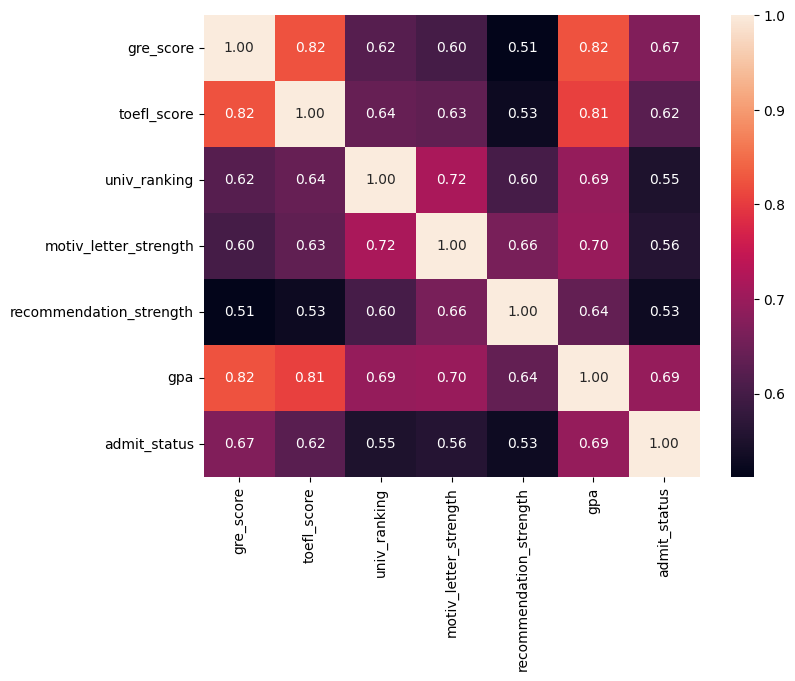

In [ ]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

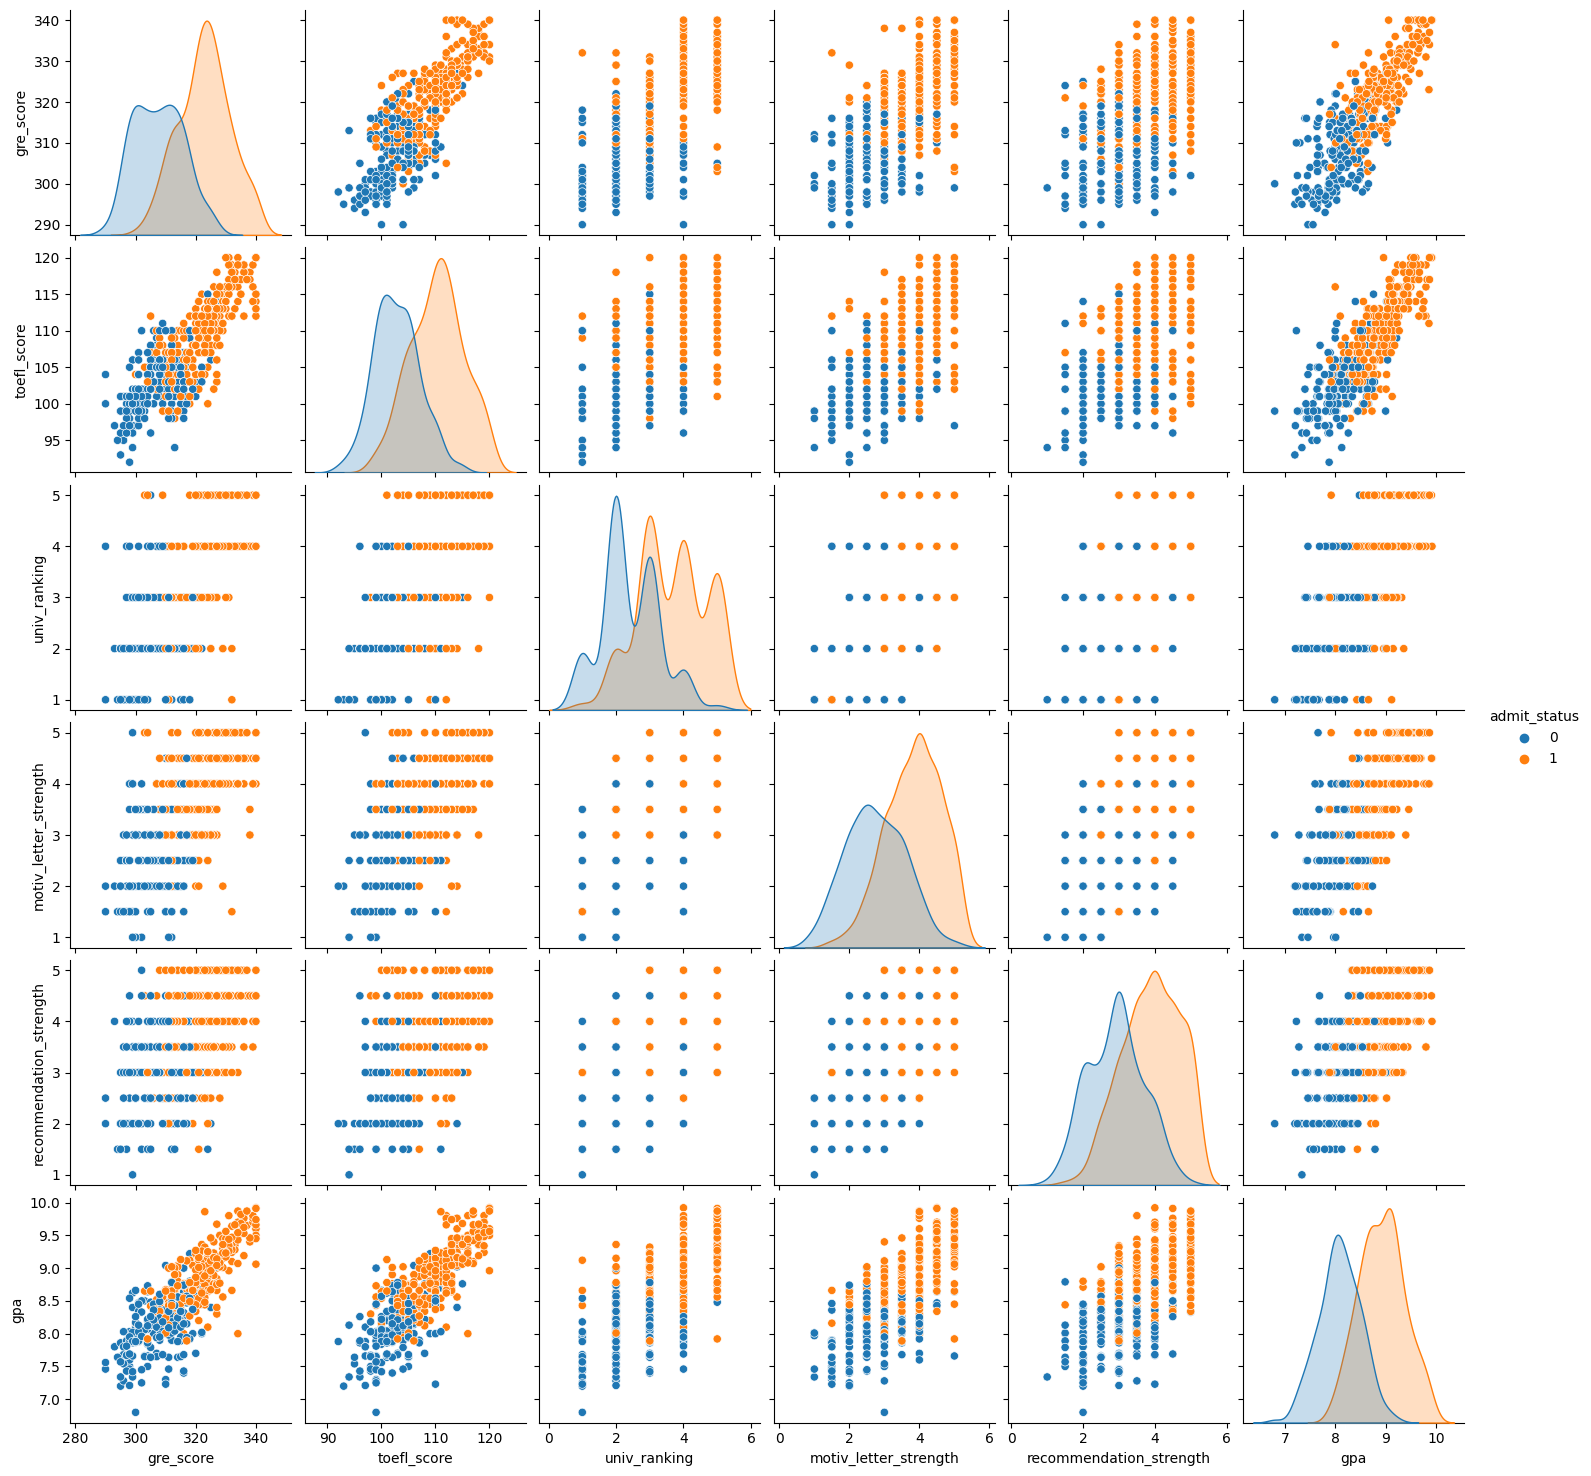

In [ ]:
# pairplot of the data
sns.pairplot(data, hue='admit_status')